<a href="https://colab.research.google.com/github/labewoor/Coding-Activities/blob/master/ANN_Diabetes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classify data of diabetes patient

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
diabetes_data=pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/diabetes.csv", sep = ",")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Data Manipulation**

In [ ]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes_data.describe()
#min values are having problem as BP,BMI,SKinthickness never be 0 i.e. some data missing or has NAN value

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data=diabetes_data.drop(['Pregnancies','Outcome'], axis=1)

In [ ]:
#Replacing 0 with nan values

data.replace(0, np.nan, inplace = True)

data.isnull().sum().sort_values(ascending = False)

Insulin                     374
SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
Age                           0
DiabetesPedigreeFunction      0
dtype: int64

**Handling Missing values**
If data is continous replace with mean if data is discerte replace by median

In [ ]:
data['Insulin'].unique()

array([ nan,  94., 168.,  88., 543., 846., 175., 230.,  83.,  96., 235.,
       146., 115., 140., 110., 245.,  54., 192., 207.,  70., 240.,  82.,
        36.,  23., 300., 342., 304., 142., 128.,  38., 100.,  90., 270.,
        71., 125., 176.,  48.,  64., 228.,  76., 220.,  40., 152.,  18.,
       135., 495.,  37.,  51.,  99., 145., 225.,  49.,  50.,  92., 325.,
        63., 284., 119., 204., 155., 485.,  53., 114., 105., 285., 156.,
        78., 130.,  55.,  58., 160., 210., 318.,  44., 190., 280.,  87.,
       271., 129., 120., 478.,  56.,  32., 744., 370.,  45., 194., 680.,
       402., 258., 375., 150.,  67.,  57., 116., 278., 122., 545.,  75.,
        74., 182., 360., 215., 184.,  42., 132., 148., 180., 205.,  85.,
       231.,  29.,  68.,  52., 255., 171.,  73., 108.,  43., 167., 249.,
       293.,  66., 465.,  89., 158.,  84.,  72.,  59.,  81., 196., 415.,
       275., 165., 579., 310.,  61., 474., 170., 277.,  60.,  14.,  95.,
       237., 191., 328., 250., 480., 265., 193.,  7

In [ ]:
# Find the mean fro insulin data
np.round(data['Insulin'].mean())


156.0

In [ ]:
#insulin is continous data so replace by mean
data['Insulin'].replace(np.nan,np.round(data['Insulin'].mean()),inplace=True)
data

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,156.0,33.6,0.627,50
1,85.0,66.0,29.0,156.0,26.6,0.351,31
2,183.0,64.0,NaN,156.0,23.3,0.672,32
3,89.0,66.0,23.0,94.0,28.1,0.167,21
4,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63
764,122.0,70.0,27.0,156.0,36.8,0.340,27
765,121.0,72.0,23.0,112.0,26.2,0.245,30
766,126.0,60.0,NaN,156.0,30.1,0.349,47


In [ ]:
#BP and skin thickness fields are continous so replace with mean
data['BloodPressure'].unique()
data['BloodPressure']

0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64

In [ ]:
np.round(data['BloodPressure'].mean())

72.0

In [ ]:
data['BloodPressure'].replace(np.nan, np.round(data['BloodPressure'].mean()),inplace=True)
data['BloodPressure']

0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64

In [ ]:
data['BloodPressure'].unique()

array([ 72.,  66.,  64.,  40.,  74.,  50.,  70.,  96.,  92.,  80.,  60.,
        84.,  30.,  88.,  90.,  94.,  76.,  82.,  75.,  58.,  78.,  68.,
       110.,  56.,  62.,  85.,  86.,  48.,  44.,  65., 108.,  55., 122.,
        54.,  52.,  98., 104.,  95.,  46., 102., 100.,  61.,  24.,  38.,
       106., 114.])

In [ ]:
data['SkinThickness'].unique()

array([35., 29., nan, 23., 32., 45., 19., 47., 38., 30., 41., 33., 26.,
       15., 36., 11., 31., 37., 42., 25., 18., 24., 39., 27., 21., 34.,
       10., 60., 13., 20., 22., 28., 54., 40., 51., 56., 14., 17., 50.,
       44., 12., 46., 16.,  7., 52., 43., 48.,  8., 49., 63., 99.])

**Imputer**

In [ ]:
#skin thickness field is discrete  so replace with median
from sklearn.impute import SimpleImputer
#Stretegy =mean/ median
impute=SimpleImputer(strategy='median')  # replaces bulk values with median
data_array=impute.fit_transform(data)
data_array

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,  29.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,  29.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
diabetes_df=pd.DataFrame(data_array,columns=data.columns)
diabetes_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,156.0,33.6,0.627,50.0
1,85.0,66.0,29.0,156.0,26.6,0.351,31.0
2,183.0,64.0,29.0,156.0,23.3,0.672,32.0
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,122.0,70.0,27.0,156.0,36.8,0.340,27.0
765,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,126.0,60.0,29.0,156.0,30.1,0.349,47.0


In [ ]:
#Add dropped columns
diabetes_df['Pregnancies'] = diabetes_data.Pregnancies
diabetes_df['Outcome'] = diabetes_data.Outcome

diabetes_df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Pregnancies                 0
Outcome                     0
dtype: int64

In [ ]:
diabetes_df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.656250,72.386719,29.108073,155.768229,32.455208,0.471876,33.240885,3.845052,0.348958
std,30.438286,12.096642,8.791221,85.021408,6.875177,0.331329,11.760232,3.369578,0.476951
min,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,0.000000
25%,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,1.000000,0.000000
50%,117.000000,72.000000,29.000000,156.000000,32.300000,0.372500,29.000000,3.000000,0.000000
75%,140.250000,80.000000,32.000000,156.000000,36.600000,0.626250,41.000000,6.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,17.000000,1.000000


**Data Augmentation**
Regenerate new samples by bootstrapping method


0    500
1    268
Name: Outcome, dtype: int64

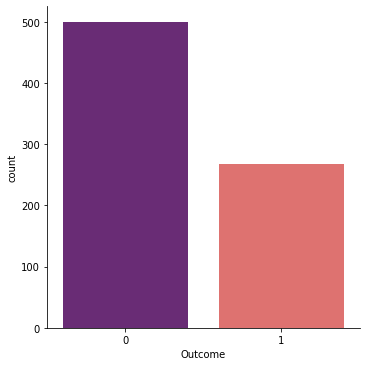

In [ ]:
#models has 500 inputs for class 0 and very less to class 1 so it is necesarry to resample data so that model won't have biased output
sns.catplot(x = 'Outcome', kind = 'count', data = diabetes_df, palette='magma') #categorical plot
diabetes_df['Outcome'].value_counts()

In [ ]:
# resample uses "bootstrapping" method to regenerate samples by randomly selecting data for every class
from sklearn.utils import resample
df_0 = diabetes_df[diabetes_df['Outcome'] == 0]
df_1 = diabetes_df[diabetes_df['Outcome'] == 1]

# apply resample for outcome 1 as it has lesser i/ps
df_1_upsample = resample(df_1, n_samples = 500, replace = True, random_state = 123) 
diabetes_df1 = pd.concat([df_0, df_1_upsample])
diabetes_df1

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
1,85.0,66.0,29.0,156.0,26.6,0.351,31.0,1,0
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1,0
5,116.0,74.0,29.0,156.0,25.6,0.201,30.0,5,0
7,115.0,72.0,29.0,156.0,35.3,0.134,29.0,10,0
10,110.0,92.0,29.0,156.0,37.6,0.191,30.0,4,0
...,...,...,...,...,...,...,...,...,...
429,95.0,82.0,25.0,180.0,35.0,0.233,43.0,1,1
701,125.0,78.0,31.0,156.0,27.6,0.565,49.0,6,1
476,105.0,80.0,45.0,191.0,33.7,0.711,29.0,2,1
579,197.0,70.0,99.0,156.0,34.7,0.575,62.0,2,1


In [ ]:
#Both the classes equal now
diabetes_df1['Outcome'].value_counts()

1    500
0    500
Name: Outcome, dtype: int64

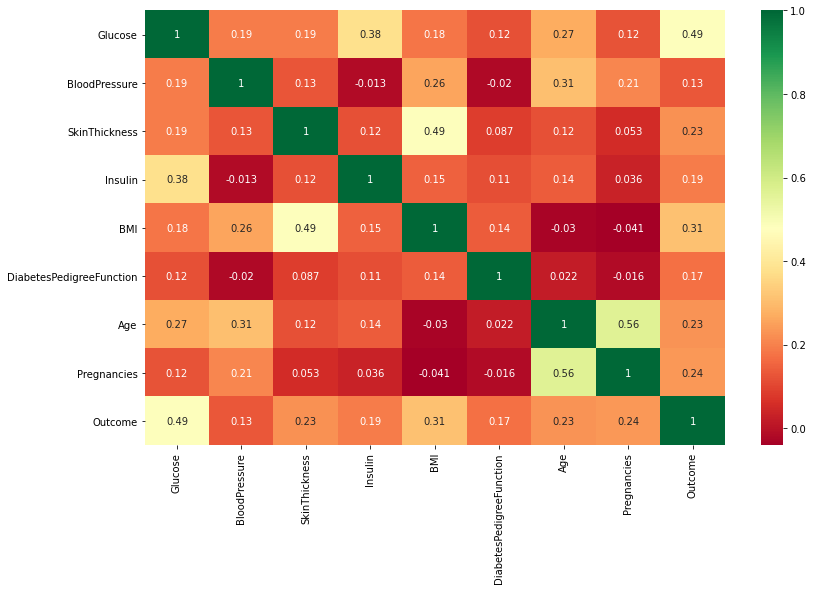

In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(diabetes_df1.corr(),annot=True, cmap = 'RdYlGn')

**Cross validation**

In [ ]:
X = diabetes_df1.drop(['Outcome'], axis = 1)
Y=diabetes_df1['Outcome']
X
Y

1      0
3      0
5      0
7      0
10     0
      ..
429    1
701    1
476    1
579    1
110    1
Name: Outcome, Length: 1000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
#Build ANN
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
def build_model():
    model = Sequential()

    # Input Layer
    model.add(Dense(units = 64, activation='relu', input_shape = [len(X.keys())]))
   # model.add(Dropout(0.2))

    # Hidden Layer - I
    model.add(Dense(units = 128, activation='relu'))
   # model.add(Dropout(0.2))

    # Hidden Layer - II
    model.add(Dense(units = 128, activation='relu'))
   # model.add(Dropout(0.2))
    
    # Output Layer
    model.add(Dense(units = 1, activation='sigmoid'))
    # learning rate for Adam Optimizers
    optimizers = Adam(learning_rate = 0.001)

    # Model compiler
    model.compile(loss = 'binary_crossentropy', optimizer = optimizers, metrics = ['accuracy'])
    
    return model 


In [ ]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 25,537
Trainable params: 25,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs = 500, batch_size= 30, validation_split = 0.2)

Epoch 1/500
22/22 [==============================] - 0s 7ms/step - loss: 0.4901 - accuracy: 0.7547 - val_loss: 0.5235 - val_accuracy: 0.7250
Epoch 2/500
22/22 [==============================] - 0s 4ms/step - loss: 0.4836 - accuracy: 0.7656 - val_loss: 0.5574 - val_accuracy: 0.7312
Epoch 3/500
22/22 [==============================] - 0s 4ms/step - loss: 0.5034 - accuracy: 0.7281 - val_loss: 0.5147 - val_accuracy: 0.7312
Epoch 4/500
22/22 [==============================] - 0s 4ms/step - loss: 0.4866 - accuracy: 0.7500 - val_loss: 0.5431 - val_accuracy: 0.7188
Epoch 5/500
22/22 [==============================] - 0s 4ms/step - loss: 0.5049 - accuracy: 0.7594 - val_loss: 0.6973 - val_accuracy: 0.6625
Epoch 6/500
22/22 [==============================] - 0s 4ms/step - loss: 0.5125 - accuracy: 0.7469 - val_loss: 0.5661 - val_accuracy: 0.7188
Epoch 7/500
22/22 [==============================] - 0s 4ms/step - loss: 0.5173 - accuracy: 0.7312 - val_loss: 0.5096 - val_accuracy: 0.7563
Epoch 8/500
2

From above model huge difference between val-accuracy and traing acuuracy so it indicates model is overfitted so need dropout 

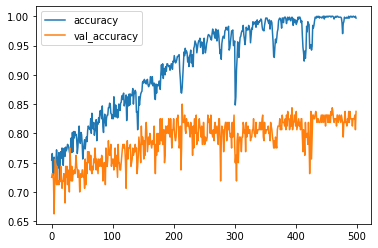

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()

In [ ]:
#Use drop out 
def build_model():
    model = Sequential()
    # Input Layer
    model.add(Dense(units = 64, activation='relu', input_shape = [len(X.keys())]))
    model.add(Dropout(0.2))
    # Hidden Layer - I
    model.add(Dense(units = 128, activation='relu'))
    model.add(Dropout(0.2))
    # Hidden Layer - II
    model.add(Dense(units = 128, activation='relu'))
    model.add(Dropout(0.2))
        # Output Layer
    model.add(Dense(units = 1, activation='sigmoid'))
# learning rate for Adam Optimizers
    optimizers = Adam(learning_rate = 0.001)
    # Model compiler
    model.compile(loss = 'binary_crossentropy', optimizer = optimizers, metrics = ['accuracy'])
    
    return model 




In [ ]:
model = build_model()
model.summary()


NameError: ignored

Epoch 1/500
26/26 [==============================] - 0s 6ms/step - loss: 0.0104 - accuracy: 0.9984 - val_loss: 1.1533 - val_accuracy: 0.8125
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 0.1543 - accuracy: 0.9516 - val_loss: 1.2146 - val_accuracy: 0.7563
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 0.6429 - accuracy: 0.8359 - val_loss: 0.9969 - val_accuracy: 0.7750
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 0.4387 - accuracy: 0.8875 - val_loss: 1.7885 - val_accuracy: 0.6750
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 0.4037 - accuracy: 0.8500 - val_loss: 1.0144 - val_accuracy: 0.7500
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 0.3265 - accuracy: 0.8766 - val_loss: 0.8005 - val_accuracy: 0.7937
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 0.3113 - accuracy: 0.8906 - val_loss: 0.6705 - val_accuracy: 0.7875
Epoch 8/500
2

[2.3933632373809814, 0.8050000071525574]

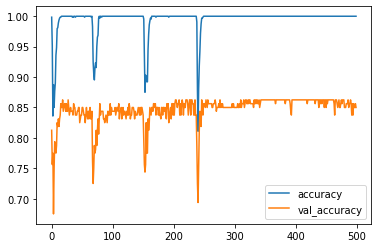

In [ ]:
history = model.fit(X_train, Y_train, epochs = 500, batch_size= 25, validation_split = 0.2)

pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()

model.evaluate(X_test, Y_test)

**Classification Report**

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        98
           1       0.78      0.85      0.82       102

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200



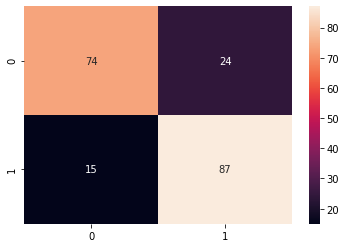

In [ ]:
predict=model.predict(X_test)
y_predicted=np.round(predict)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_predicted)

sns.heatmap(confusion_matrix(Y_test, y_predicted), annot = True)
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_predicted))
